<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/test/notebooks/k2sff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
k2 = cr.K2sff(epicid=211929937, verbose=True)

Target: EPIC 211929937
Available campaigns: [ 5 18]
Using campaign=5.
Target: None
Querying EPIC 211929937 (campaign 5) K2SFF light curve from MAST...
Filename: /home/jp/.astropy/cache/download/py3/6558cb2b985ed5f5a02f4f1b988ebc43
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  BESTAPER      1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  2  CIRC_APER0    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  3  CIRC_APER1    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  4  CIRC_APER2    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  5  CIRC_APER3    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  6  CIRC_APER4    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  7  CIRC_APER5    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  8  CIRC_APER6    1 BinTableHDU    242   3403R x 6C   [D, D, D, D, I, J]   
  9  CIRC_APER7    1 BinTableHDU    242 

In [5]:
k2.k2sff_best_aper_mask

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

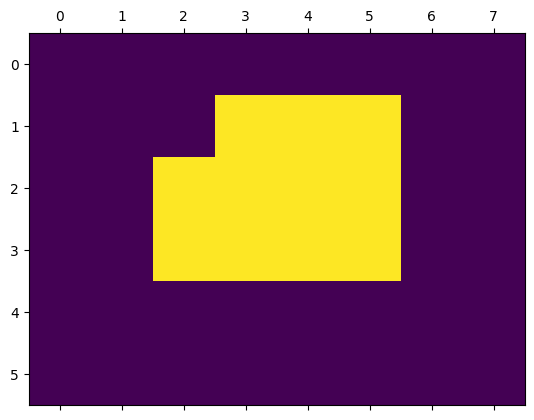

In [6]:
import matplotlib.pyplot as pl

pl.matshow(k2.k2sff_best_aper_mask)

Querying Gaia DR2 catalog for ra,dec=(129.178 19.1738) within 84.0 arcsec.
Querying DSS2 Red (84.00 arcsec x 84.00 arcsec) archival image


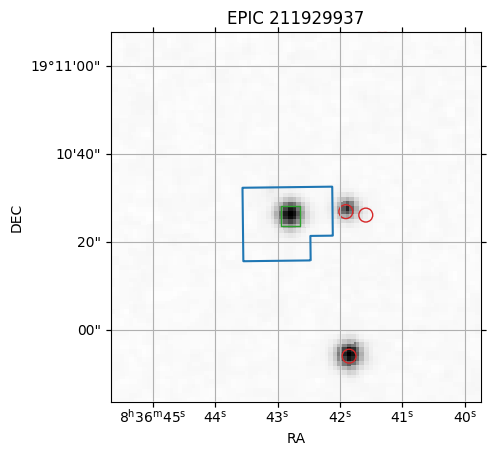

In [7]:
ax = k2.plot_gaia_sources_on_survey() 

In [9]:
epics = """201663879,
201663913,
201796690,
245944983,
246074965,
246163416,
246313886,
246331347,
246331418,
246472939,
246909566,
248480671,
248558190,
248616368,
248639308,
248775938,
248782482,
249384674,
249391469,
249557502,
249826231,
250001426,
250099723,
247335861""".split(',')

0it [00:00, ?it/s]

Available campaigns: [14]
Using campaign=14.


1it [00:11, 11.33s/it]

Available campaigns: [14]
Using campaign=14.


2it [00:19, 10.50s/it]

Available campaigns: [14]
Using campaign=14.


3it [00:29, 10.15s/it]

Available campaigns: [12 12]
Using campaign=12.


4it [00:39, 10.07s/it]

Available campaigns: [12 19]
Using campaign=12.


24it [00:53,  2.23s/it]

<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not known>
<urlopen error [Errno -2] Name or service not 

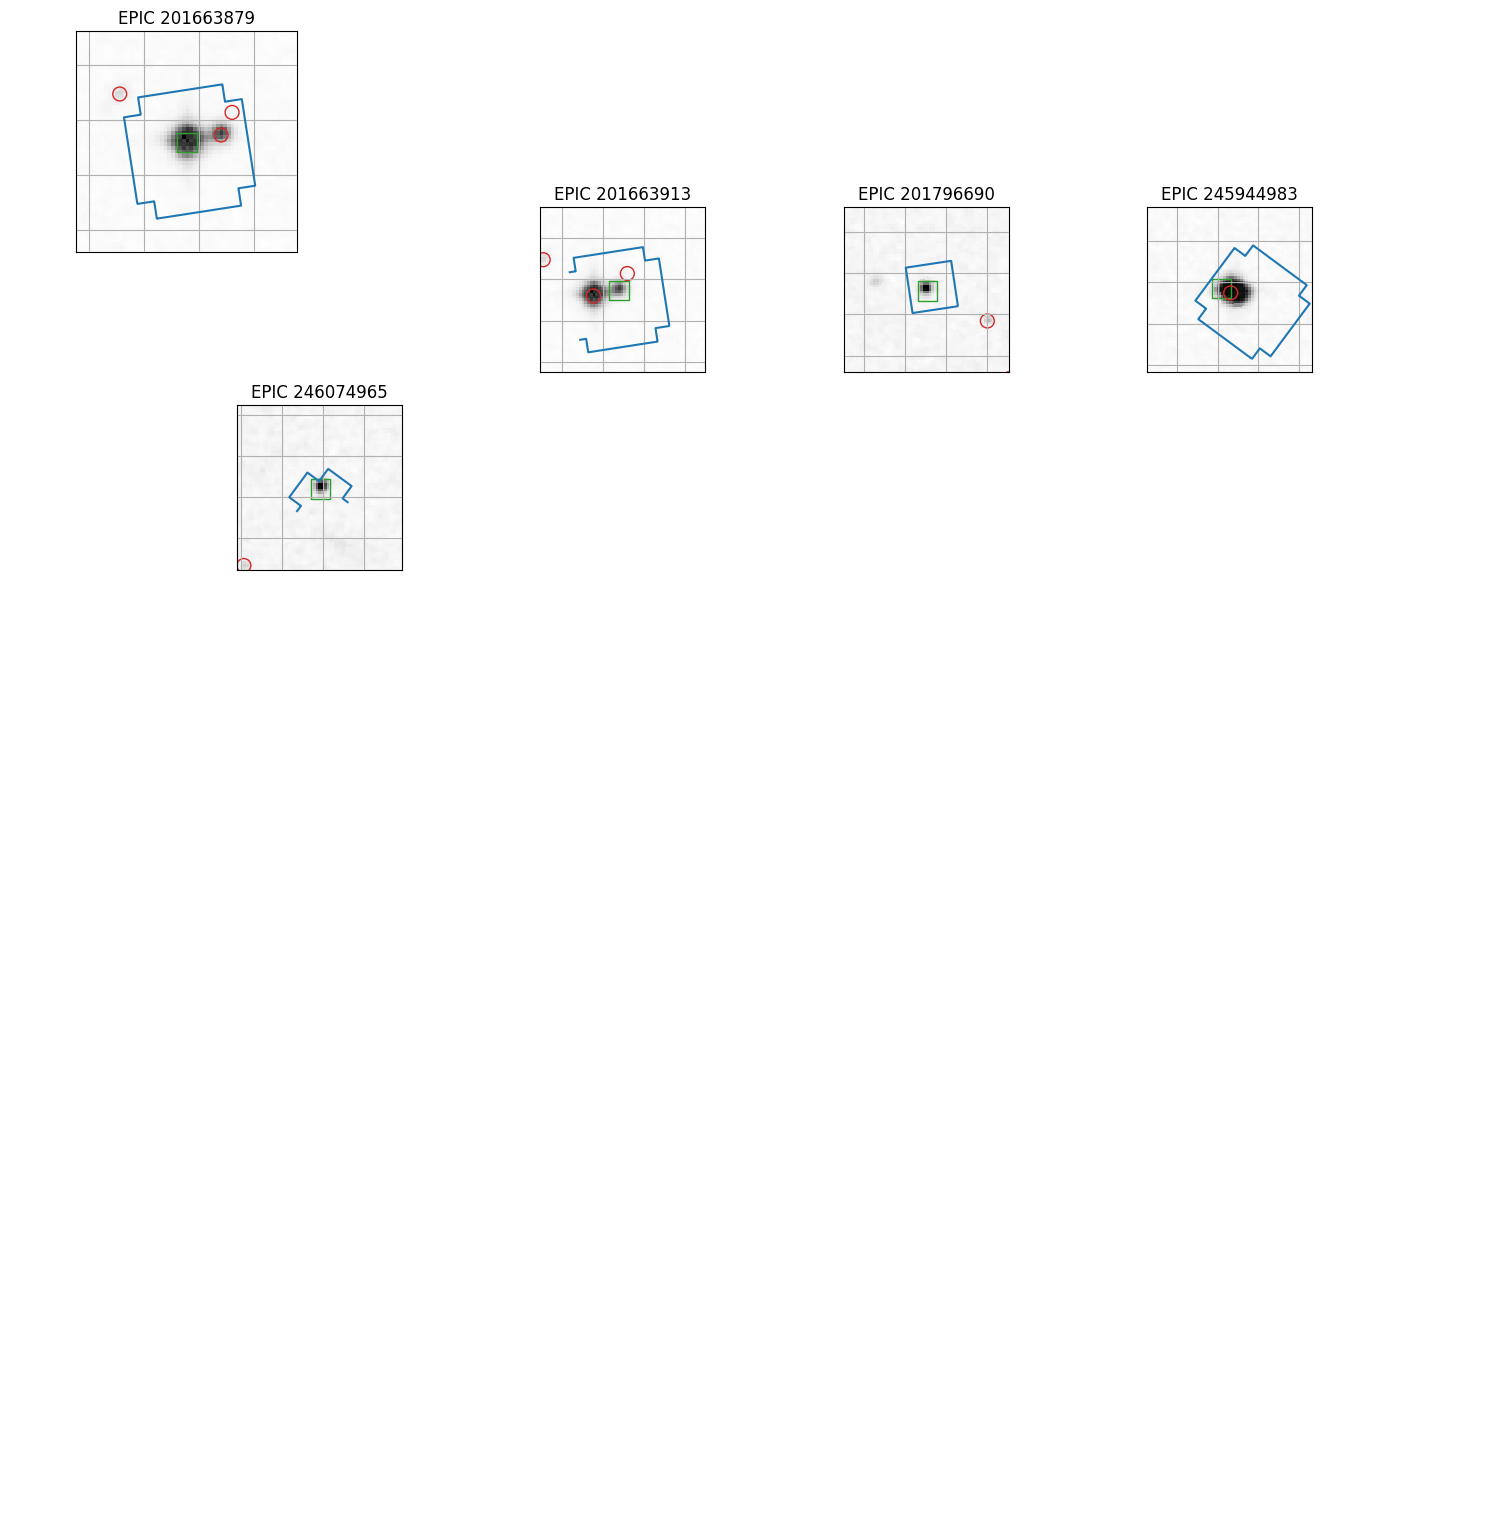

In [10]:
import matplotlib.pyplot as pl
from astroquery.skyview import SkyView
from astropy.wcs import WCS
import astropy.units as u
from tqdm import tqdm

fig = pl.figure(figsize=(15,15), constrained_layout=True)

survey = "DSS2 Red"
fov_rad = 60*u.arcsec
for i,epic in tqdm(enumerate(epics)):
    try:
        k2 = cr.K2sff(epicid=int(epic), verbose=False)
        # fetch survey image hdu
        hdu = SkyView.get_images(position=k2.target_coord, coordinates='icrs',
                                 survey=survey, radius=fov_rad, grid=False)[0][0]
        # create subplot with projection based on hdu image
        ax = fig.add_subplot(6,4,i+1, projection=WCS(hdu.header))
        # plot
        ax2 = k2.plot_gaia_sources_on_survey(ax=ax, survey=survey, fov_rad=fov_rad)
    except Exception as e:
        print(e)
    # cleanup axes
    r = ax2.coords['ra']
    d = ax2.coords['dec']
    r.set_ticks_visible(False)
    r.set_ticklabel_visible(False)
    d.set_ticks_visible(False)
    d.set_ticklabel_visible(False)
# fig.subplots_adjust(hspace=0)
# fig.subplots_adjust(wspace=0)